In [1]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
# Sempre redefina o gerador de números pseudo-aleatórios para um valor conhecido para que seus resultados sejam sempre os mesmos.
np.random.seed(1234)

### Gerando a função observável.

In [3]:
# Definindo número de exemplos.
N = 1000

# Atributo.
x1 = np.random.rand(N,1)

# Ruído.
w = np.sqrt(0.1)*np.random.randn(N,1)

# Função objetivo.
y = x1

# Função observável (ruidosa).
y_noisy = y + w

### Comparando a função observável com a objetivo.

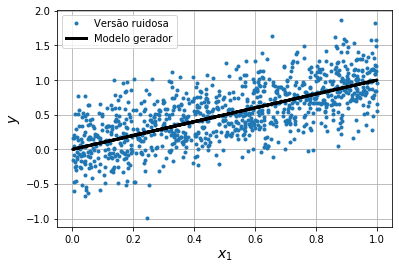

In [4]:
plt.plot(x1, y_noisy,'.', label='Versão ruidosa')
plt.plot(x1, y, 'k', linewidth=3, label='Modelo gerador')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid()
plt.legend()
#plt.savefig("observable_function.png", dpi=600)
plt.show()

### Implementação da eq. normal.

A função `pinv` calcula a matriz pseudo-inversa de uma matriz.

In [5]:
# Equação normal.
a_opt = np.linalg.pinv(np.transpose(x1).dot(x1)).dot(np.transpose(x1).dot(y_noisy))

# Imprimindo o valor encontrado para o peso a1.
print('a1:',a_opt[0][0])

# Função hipótese em formato vetorial.
yhat = a_opt*x1

# Cálculo do EQM.
Joptimum = (1.0/N)*np.sum(np.power((y_noisy - yhat), 2))

# Imprimindo o valor do erro.
print('Joptimum:', Joptimum)

a1: 1.0040428246246837
Joptimum: 0.09943362282057217


### Definição da função que calcula a superfície de erro.

In [6]:
def calculateErrorSurface(y, x1):
    """
    Generate data points for plotting the error surface.
    """
    # Generate values for parameter space.
    M = 200
    # M linearly spaced values.
    a1 = np.linspace(-2.0, 4.0, M)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((M,1))
    for k in range(0, M):
        # Hypothesis function.
        yhat = a1[k]*x1
        # Calculate the mean squared error for each a1 value.
        J[k] = (1.0/len(y))*np.sum(np.square(y - yhat))          
            
    return J, a1

### Plotando a superfície de erro.

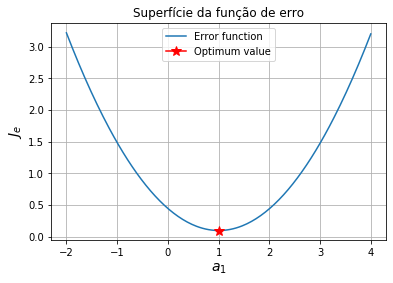

In [7]:
J, a1 = calculateErrorSurface(y_noisy, x1)

# Plot cost-function surface.
plt.figure()
plt.plot(a1, J, label='Error function')
plt.plot(a_opt, Joptimum, c='r', marker='*', markersize=10, label='Optimum value')
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$J_e$', fontsize=14)
plt.title('Superfície da função de erro')
plt.grid()
plt.legend()
plt.savefig("error_surface_example1.png", dpi=600)

# Show the plot.
plt.show()

### Comparando o resultado da aproximação.

Uso o peso encontrado pela equação normal para aproximar a função verdadeira através da função hipótese.

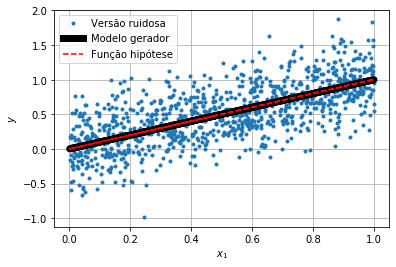

In [8]:
# Hypothesis function.
y_pred = a_opt*x1

# Compare the results.
plt.plot(x1, y_noisy, '.', label='Versão ruidosa')
plt.plot(x1, y, 'k', label='Modelo gerador', linewidth=7)
plt.plot(x1, y_pred, 'r--', label='Função hipótese')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.grid()
plt.legend()
#plt.savefig("prediction.png", dpi=600)
plt.show()